<a href="https://colab.research.google.com/github/cdnyyzyul/LOG8415/blob/main/plot_sentiment_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# convert one result file, which is a text file, to a dictionary.
def text_to_dict(filename):

  with open(filename, 'r') as content_file:

      content = content_file.read()

      content_length = len(content)
      decode_index = 0

      result_dict = {}

      while decode_index < content_length:
          try:
              obj, decode_index = decoder.raw_decode(content, decode_index)
              # print("File index:", decode_index)
              # print(obj)
              result_dict[decode_index] = obj
          except json.JSONDecodeError as e:
              print("JSONDecodeError:", e)
              # Scan forward and keep trying to decode
              decode_index += 1

  return result_dict

In [11]:
# for all the files in the "result directory", create one dataframe.

os.chdir("/content/drive/MyDrive/LOG8415_tps/personal_project/results")
decoder = json.JSONDecoder()

df = pd.DataFrame()
for filename in os.listdir("./"):
  if os.path.isfile(filename):
    result_dict = text_to_dict(filename)
    df_tmp = pd.DataFrame(result_dict).T
    df = pd.concat([df, df_tmp])
    print(filename, df.shape)

Tweets-PUT-S3-sF1ta-3-2021-12-03-20-31-45-5c455164-b4c6-4e90-b6f0-711b721d9a48 (40, 3)
Tweets-PUT-S3-sF1ta-3-2021-12-03-20-42-21-70c8116d-932e-49bb-b0c2-d12e809583a8 (98, 3)
Tweets-PUT-S3-sF1ta-3-2021-12-03-20-43-22-67f4865e-404d-4495-bb5d-40900c302103 (155, 3)
Tweets-PUT-S3-sF1ta-3-2021-12-03-20-44-22-92065ef2-fe7d-4a32-9067-0a9420ffebb7 (212, 3)
Tweets-PUT-S3-sF1ta-3-2021-12-03-20-45-22-5621038e-8f4b-4a33-8de4-8ece0842c285 (240, 3)
Tweets-PUT-S3-sF1ta-3-2021-12-01-04-23-38-a70cd4c4-49cb-4887-9c07-bd844be79e8e (298, 3)
Tweets-PUT-S3-sF1ta-3-2021-12-03-21-00-58-8f01654b-f8ad-420f-8cfb-93838e33af8b (356, 3)
Tweets-PUT-S3-sF1ta-3-2021-12-03-21-02-00-d7c2f8e3-6174-4ac1-85e4-98a818625297 (411, 3)
Tweets-PUT-S3-sF1ta-3-2021-12-01-04-04-59-29348bb9-5ece-4f2a-8796-179ede2e22aa (441, 3)
Tweets-PUT-S3-sF1ta-3-2021-12-01-04-24-38-25f5a414-0642-419e-b0a3-27c78c38f4ae (499, 3)
Tweets-PUT-S3-sF1ta-3-2021-12-01-04-27-41-c5dc5bf7-a74d-4431-a60a-f39c57003d3c (558, 3)
Tweets-PUT-S3-sF1ta-3-2021-12-01-0

In [ ]:
df.dtypes

message      object
sentiment    object
score        object
dtype: object

In [12]:
 # set the score to float, aggrated by sentiment, create dfplot dataframe
 
 df.score = df.score.astype(float)
 dfplot = df.groupby(['sentiment']).agg(counts = pd.NamedAgg(column="sentiment", aggfunc="count"),
                               average_score = pd.NamedAgg(column="score", aggfunc='mean'))
 dfplot

,counts,average_score
sentiment,,
negative,324,0.738613
neutral,325,0.641256
postive,34,0.516175


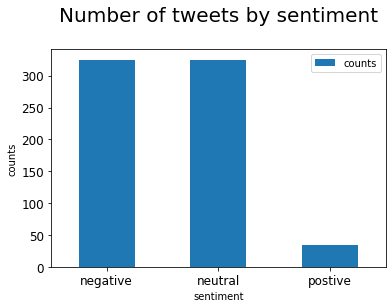

In [13]:
# option 1: graph
ax = dfplot[["counts"]].plot.bar(rot=0, width=0.5)
ax.set_ylabel("counts")
title = "Number of tweets by sentiment\n"
ax.set_title(title, fontsize=20)
ax.tick_params(labelsize=12)

plt.show()

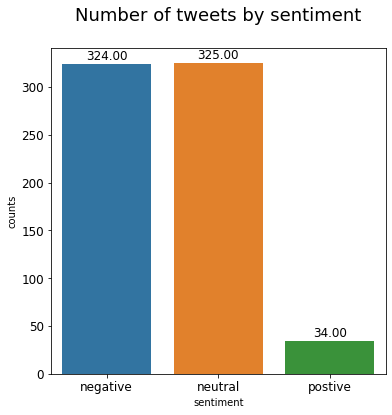

In [14]:
# option 2 to create the same graph.
plt.figure(figsize=(6,6))
graph = sns.barplot(x=dfplot.index, y="counts", data=dfplot)

for bar in graph.patches:

# Using Matplotlib's annotate function and
# passing the coordinates where the annotation shall be done
# x-coordinate: bar.get_x() + bar.get_width() / 2
# y-coordinate: bar.get_height()
# free space to be left to make graph pleasing: (0, 8)
# ha and va stand for the horizontal and vertical alignment
  graph.annotate(format(bar.get_height(), '.2f'),
          (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
          size=12, xytext=(0, 8),
          textcoords='offset points')

# ax.set_ylabel("counts")
g_title = "Number of tweets by sentiment\n"
graph.set_title(g_title, fontsize=18)
graph.tick_params(labelsize=12)
plt.show()

In [15]:
dfmsgByType = df.loc[df.sentiment == "negative"] 

In [16]:
dfmsgByType.head()

,message,sentiment,score
209,Can the curse be broken for a happy ever after...,negative,0.552590
413,RT @SecondGentleman: Happy birthday to @PressS...,negative,0.784836
751,"RT @FredoBang: I’m Semi-happy Right Na, Leave ...",negative,0.438864
947,""" i mean if your happy then I am too""\n"" I hea...",negative,0.712571
1101,RT @_fels1: Happy New Month to all of you. May...,negative,0.894813


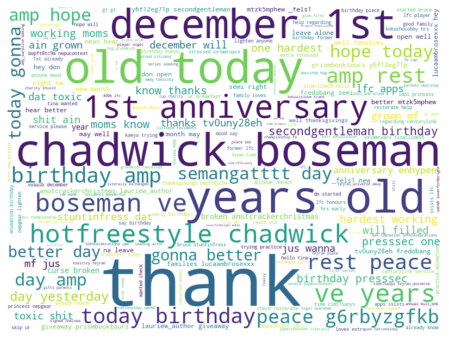

In [17]:
from wordcloud import WordCloud, STOPWORDS

# stopwords do not appear in the wordcloud.
stopwords = STOPWORDS.copy()
stopwords.update(['http', 'https', 'co', 'rt', 'happy', 'happiness']) # add some additional stopwords.

# make all the text lowercase and combine everything together.
all_txt = [txt.lower() for txt in dfmsgByType.message.to_list()]
all_txt = ' '.join(all_txt)

# create and plot the wordcloud.
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=600).generate(all_txt)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()